**Simple Linear Regression**

1. Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


2. Data Preprocessing

In [2]:
X = dataset.iloc[:,:-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector

print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


3. Splitting the dataset (train:test is 80:20 or 70:30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)


4. Fitting linear regression mode into the training set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data


LinearRegression()

5. Predicting the test set results

In [5]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [6]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [7]:
y_pred = regressor.predict([[12]])
y_pred

array([138967.5015615])

**Visualizing the results**

1.  Plotting the points

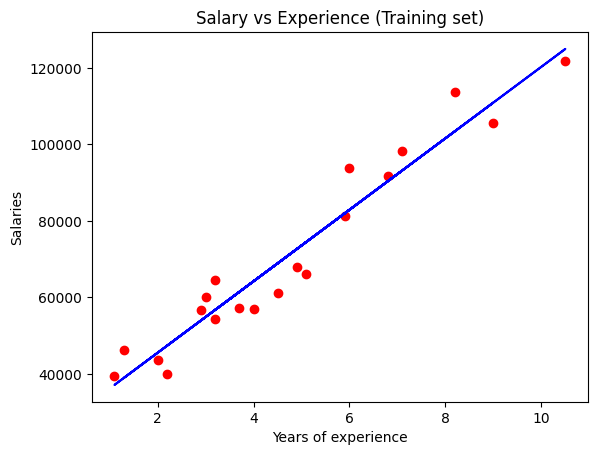

In [8]:
#plot for the TRAIN

plt.scatter(X_train, y_train, color='red') # plotting the observation line

plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line

plt.title("Salary vs Experience (Training set)") # stating the title of the graph

plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

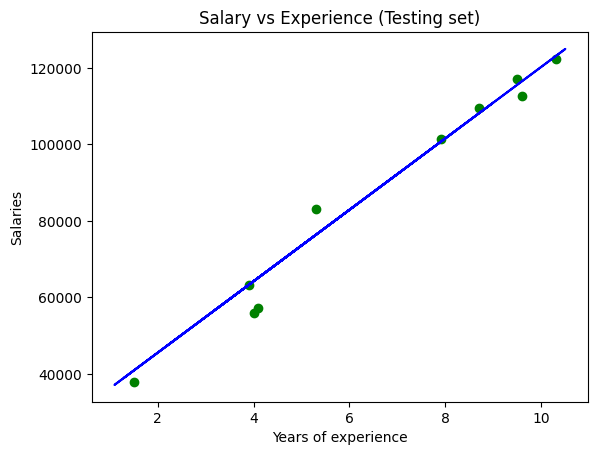

In [11]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line

plt.title("Salary vs Experience (Testing set)")

plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()

**Multiple Linear Regression**

1. Importing Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('50_Startups.csv')
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


2. Data prepocessing

In [13]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

print(X)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

3. Encoding the categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:,3] = labelEncoder_X.fit_transform(X[ : , 3])

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=float)

4. Avoiding the dummy variable trap

In [16]:
X = X[:, 1:]

print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

5. Splitting the test and train set (train:test, 80:20)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


6. Fitting the model

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

7. Predicting the test set result

In [19]:
y_pred = regressor.predict(X_test)
y_test


array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [20]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

8. Plotting Data


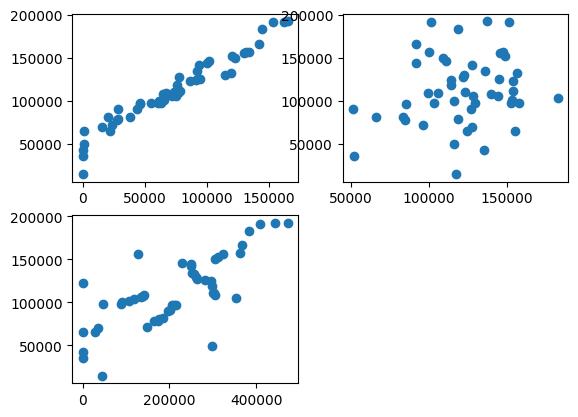

In [21]:
# Set the features of our model, these are our potential inputs
features = ['R&D Spend', 'Administration', 'Marketing Spend']
# Set the variable X to be all our input columns: R&D, Administration and Marketing
X = dataset[features]
# set y to be our output column: Profit
y = dataset.Profit
#plt.subplot enables us to plot mutliple graphs
#we produce scatter plots for Profit against each of our input variables
plt.subplot(2,2,1)
plt.scatter(X['R&D Spend'],y)
plt.subplot(2,2,2)
plt.scatter(X['Administration'],y)
plt.subplot(2,2,3)
plt.scatter(X['Marketing Spend'],y)

In [22]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [24]:
X = X.drop("Administration", axis=1)

In [25]:
X

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


Text(0.5, 0, 'Profit')

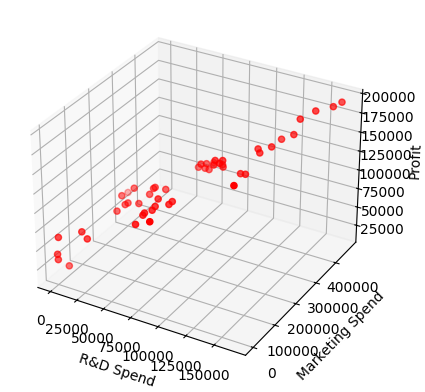

In [26]:
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = X["R&D Spend"]
x2 = X["Marketing Spend"]
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

**Now with Weather Data**

In [27]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import our WeatherDataM and store it in the variable weather_data_m
weather_data_m = pd.read_csv("WeatherDataM.csv")
# Display the data in the notebook
weather_data_m

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83
5,9.222222,13.9587,1016.66,0.85
6,7.733333,12.3648,1016.72,0.95
7,8.772222,14.1519,1016.84,0.89
8,10.822222,11.3183,1017.37,0.82
9,13.772222,12.5258,1017.22,0.72


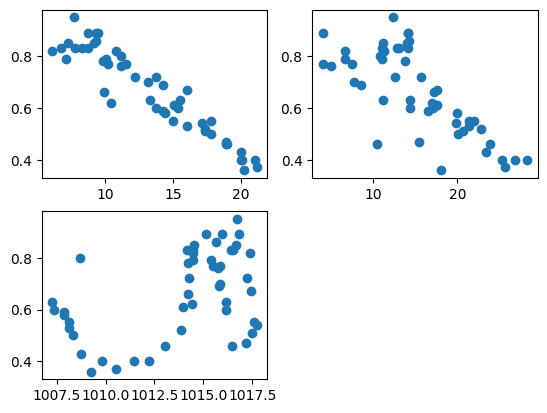

In [28]:
# Set the features of our model, these are our potential inputs
weather_features = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)']
# Set the variable X to be all our input columns: Temperature, Wind Speed and Pressure
X = weather_data_m[weather_features]
# set y to be our output column: Humidity
y = weather_data_m.Humidity
# plt.subplot enables us to plot mutliple graphs
# we produce scatter plots for Humidity against each of our input variables
plt.subplot(2,2,1)
plt.scatter(X['Temperature (C)'],y)
plt.subplot(2,2,2)
plt.scatter(X['Wind Speed (km/h)'],y)
plt.subplot(2,2,3)
plt.scatter(X['Pressure (millibars)'],y)

In [29]:
X

,Temperature (C),Wind Speed (km/h),Pressure (millibars)
0,9.472222,14.1197,1015.13
1,9.355556,14.2646,1015.63
2,9.377778,3.9284,1015.94
3,8.288889,14.1036,1016.41
4,8.755556,11.0446,1016.51
5,9.222222,13.9587,1016.66
6,7.733333,12.3648,1016.72
7,8.772222,14.1519,1016.84
8,10.822222,11.3183,1017.37
9,13.772222,12.5258,1017.22


In [31]:
X = X.drop("Pressure (millibars)", axis = 1)

In [32]:
X

,Temperature (C),Wind Speed (km/h)
0,9.472222,14.1197
1,9.355556,14.2646
2,9.377778,3.9284
3,8.288889,14.1036
4,8.755556,11.0446
5,9.222222,13.9587
6,7.733333,12.3648
7,8.772222,14.1519
8,10.822222,11.3183
9,13.772222,12.5258


Text(0.5, 0, 'Humidity')

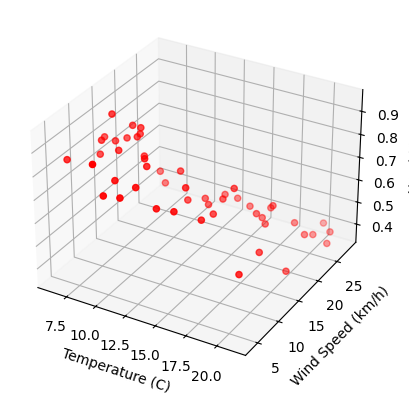

In [33]:
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = X["Temperature (C)"]
x2 = X["Wind Speed (km/h)"]
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Wind Speed (km/h)')
ax.set_zlabel('Humidity')


In [34]:
from sklearn.linear_model import LinearRegression
# Define the variable mlr_model as our linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

LinearRegression()

In [35]:
theta0 = mlr_model.intercept_
theta1, theta2 = mlr_model.coef_
theta0, theta1, theta2

(1.1431751025645598, -0.03095902199145561, -0.0043607913562168825)

In [36]:
y_pred = mlr_model.predict([[15, 21]])
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.58721315])